In [1]:
from neo4j_runway import Discovery, GraphDataModeler, PyIngest, UserInput
from neo4j_runway.code_generation import PyIngestConfigGenerator
from neo4j_runway.llm.openai import OpenAIDiscoveryLLM, OpenAIDataModelingLLM

In [2]:
from dotenv import load_dotenv
import os

In [3]:
load_dotenv(dotenv_path='dot.env')
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
NEO4J_URL = os.getenv("NEO4J_URL")
NEO4J_USERNAME = os.getenv("NEO4J_USERNAME")
NEO4J_PASSWORD = os.getenv("NEO4J_PASSWORD")

In [5]:
from neo4j_runway.utils.data import load_local_files

data_directory = ""

data_dictionary = { 'Name': 'name of shoe.',
                    'Brand': 'brand of shoe.',
                    'Other Features':'other details about the shoe.',
                    'Offset': 'the difference of the stack height of heel and forefoot. also known as heel to toe drop.',
                    'Stack Height':'the height of the heel and the height of the forefoot that is given.',
                    'Cushioning': 'the level of the cushioning of the shoe.',
                    'Foam Cushioning': 'the name of type of foam cushioning used for the shoe.'
                    }

use_cases = ["Which shoe has an offset lower than 8mm?", "Which shoes have PWRRUN PB foam cushioning?", "Which shoe have a carbon plate in other features?"]

data = load_local_files(data_directory=data_directory,
                        data_dictionary=data_dictionary,
                        general_description="This is data about shoes and their attributes.",
                        use_cases=use_cases,
                        include_files=["shoes.csv"])

In [6]:
llm_disc = OpenAIDiscoveryLLM(model_name='gpt-4o-mini-2024-07-18', model_params={"temperature": 0})
llm_dm = OpenAIDataModelingLLM(model_name='gpt-4o-2024-05-13', model_params={"temperature": 0.5})

In [7]:
disc = Discovery(llm=llm_disc, data=data)
disc.run()

disc.run(show_result=True, notebook=True)

### Preliminary Analysis of Shoe Data

#### Overall Data Characteristics:
1. **Total Entries**: The dataset contains 37 entries, indicating a relatively small sample size.
2. **Data Types**: All features are of type `object`, which suggests that they may contain categorical data or strings. This could limit certain types of analysis unless converted to appropriate types (e.g., numerical for heights).
3. **Missing Values**: 
   - **Other Features**: 16 missing values (43% missing)
   - **Stack Height**: 27 missing values (73% missing)
   - **Cushioning**: 6 missing values (16% missing)
   - **Foam Cushioning**: 9 missing values (24% missing)
   This indicates that the dataset has significant missing data in certain columns, particularly in 'Stack Height' and 'Other Features', which may affect analysis and insights.

#### Feature Analysis:
1. **Name**: 
   - Unique values: 37 (each shoe has a unique name).
   - This feature is essential for identification but does not provide analytical value.

2. **Brand**: 
   - Unique values: 7 (Nike is the most frequent brand with 7 occurrences).
   - This feature can help in brand-specific analysis and comparisons.

3. **Other Features**: 
   - Unique values: 12 (with 'Carbon Plate' being the most frequent feature).
   - This feature is crucial for understanding additional shoe characteristics, but the high number of missing values limits its utility.

4. **Offset**: 
   - Unique values: 9 (most common offset is 8mm).
   - This feature is important for identifying shoes with specific drop characteristics, relevant for performance and comfort.

5. **Stack Height**: 
   - Unique values: 8 (with a top value of '39.5mm/31.5mm').
   - The high number of missing values makes this feature less reliable for analysis.

6. **Cushioning**: 
   - Unique values: 14 (most common is 'Max').
   - This feature is significant for understanding the comfort level of the shoes.

7. **Foam Cushioning**: 
   - Unique values: 16 (most common is 'Helion').
   - This feature is important for identifying the type of cushioning technology used in the shoes.

#### Important Features for Use Cases:
- **Offset**: Critical for identifying shoes with an offset lower than 8mm.
- **Foam Cushioning**: Necessary for finding shoes with PWRRUN PB foam cushioning.
- **Other Features**: Essential for identifying shoes that have a carbon plate.

### Summary:
The dataset provides a variety of features related to shoes, but it suffers from significant missing values in key areas like 'Stack Height' and 'Other Features'. The most important features for the specified use cases are 'Offset', 'Foam Cushioning', and 'Other Features'. The brand distribution indicates a concentration around Nike, which may influence market analysis. Overall, while the dataset has potential, the missing values and categorical nature of the data will require careful handling in any analysis or modeling.

### Preliminary Analysis of Shoe Data

#### Overall Details:
1. **Data Structure**: The dataset consists of 37 entries (shoes) and 7 features (columns). All features are of type `object`, indicating that they are categorical or string data.
2. **Missing Values**: There are several features with missing values:
   - **Other Features**: 21 non-null (16 missing)
   - **Stack Height**: 10 non-null (27 missing)
   - **Cushioning**: 31 non-null (6 missing)
   - **Foam Cushioning**: 28 non-null (9 missing)
   This indicates that a significant portion of the data is missing for certain features, particularly for Stack Height.

3. **Unique Values**: The dataset has a good variety of unique values across features:
   - **Name**: 37 unique shoe names, indicating a diverse selection.
   - **Brand**: 7 unique brands, with Nike being the most frequent (7 occurrences).
   - **Other Features**: 12 unique features, with Carbon Plate being the most common (9 occurrences).
   - **Offset**: 9 unique values, with 8mm being the most frequent (12 occurrences).
   - **Stack Height**: 8 unique values, but with many missing entries.
   - **Cushioning**: 14 unique levels of cushioning, with Max being the most common (6 occurrences).
   - **Foam Cushioning**: 16 unique types of foam, with Helion being the most frequent (3 occurrences).

#### Important Features:
1. **Offset**: This feature is crucial for identifying shoes with specific heel-to-toe drop characteristics. It can help answer the use case regarding shoes with an offset lower than 8mm.
2. **Cushioning**: This feature provides insights into the comfort level of the shoes and can be used to filter shoes with specific foam types, such as PWRRUN PB.
3. **Other Features**: This feature can help identify shoes with specific technologies, such as those containing a carbon plate.
4. **Brand**: Knowing the brand can be important for brand loyalty and marketing strategies.
5. **Stack Height**: Although it has many missing values, it can provide insights into the overall height of the shoe, which may affect performance and comfort.

#### Use Case Insights:
- To find shoes with an offset lower than 8mm, we can filter the Offset feature.
- To identify shoes with PWRRUN PB foam cushioning, we can filter the Foam Cushioning feature.
- To find shoes with a carbon plate in the Other Features, we can filter that feature accordingly.

### Conclusion:
The dataset provides a rich set of features to analyze shoe characteristics, but the presence of missing values in key features like Stack Height and Foam Cushioning may limit some analyses. The most important features for the specified use cases are Offset, Cushioning, and Other Features.

In [8]:
gdm = GraphDataModeler(llm=llm_dm, discovery=disc)

In [9]:
gdm.create_initial_model()

> Generating Nodes...
Attempts | 2  
Received Valid Nodes
Nodes
* (:Shoe)         * (:Feature)
* (:Offset)       * (:StackHeight)
* (:Cushioning)   * (:FoamCushioning) 

> Generating Data Model...
Attempts | 1  
Received Valid Data Model
Nodes
* (:Shoe)         * (:Feature)
* (:Offset)       * (:StackHeight)
* (:Cushioning)   * (:FoamCushioning) 

Relationships
* (:Shoe)-[:HAS_FEATURE]->(:Feature)                  
* (:Shoe)-[:HAS_OFFSET]->(:Offset)                    
* (:Shoe)-[:HAS_STACK_HEIGHT]->(:StackHeight)         
* (:Shoe)-[:HAS_CUSHIONING]->(:Cushioning)            
* (:Shoe)-[:HAS_FOAM_CUSHIONING]->(:FoamCushioning)   


DataModel(nodes=[Node(label='Shoe', properties=[Property(name='name', type='str', column_mapping='Name', alias=None, is_unique=True, part_of_key=False), Property(name='brand', type='str', column_mapping='Brand', alias=None, is_unique=False, part_of_key=False)], source_name='file'), Node(label='Feature', properties=[Property(name='feature', type='str', column_mapping='Other Features', alias=None, is_unique=True, part_of_key=False)], source_name='file'), Node(label='Offset', properties=[Property(name='offsetValue', type='str', column_mapping='Offset', alias=None, is_unique=True, part_of_key=False)], source_name='file'), Node(label='StackHeight', properties=[Property(name='stackHeightValue', type='str', column_mapping='Stack Height', alias=None, is_unique=True, part_of_key=False)], source_name='file'), Node(label='Cushioning', properties=[Property(name='cushioningLevel', type='str', column_mapping='Cushioning', alias=None, is_unique=True, part_of_key=False)], source_name='file'), Node(lab

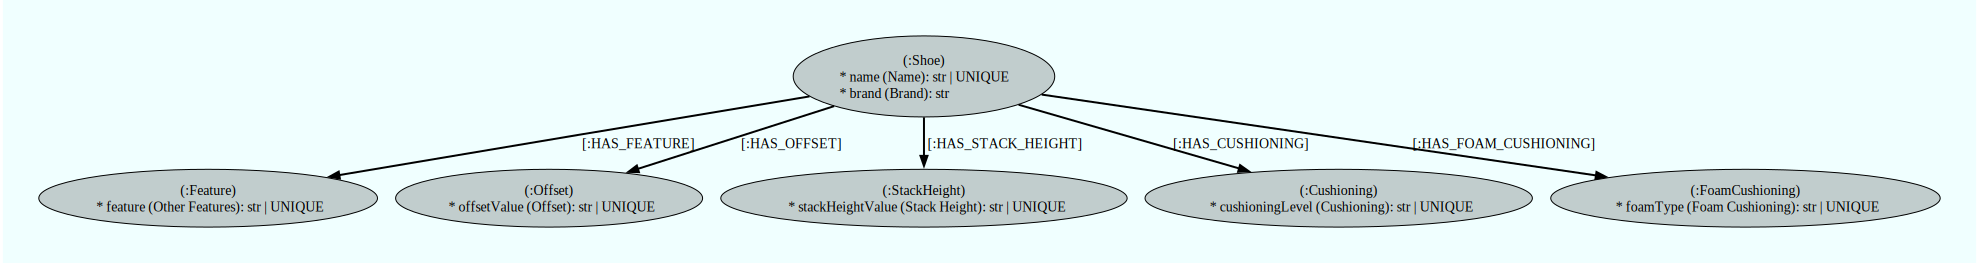

In [10]:
gdm.current_model.visualize()

### Now that we have generated a model, we can make changes to the model ###

> Generating Data Model...
Attempts | 1  
Received Valid Data Model
Nodes
* (:Shoe)             * (:Offset)
* (:StackHeight)      * (:Cushioning)
* (:FoamCushioning)    

Relationships
* (:Shoe)-[:HAS_OFFSET]->(:Offset)                    
* (:Shoe)-[:HAS_STACK_HEIGHT]->(:StackHeight)         
* (:Shoe)-[:HAS_CUSHIONING]->(:Cushioning)            
* (:Shoe)-[:HAS_FOAM_CUSHIONING]->(:FoamCushioning)   


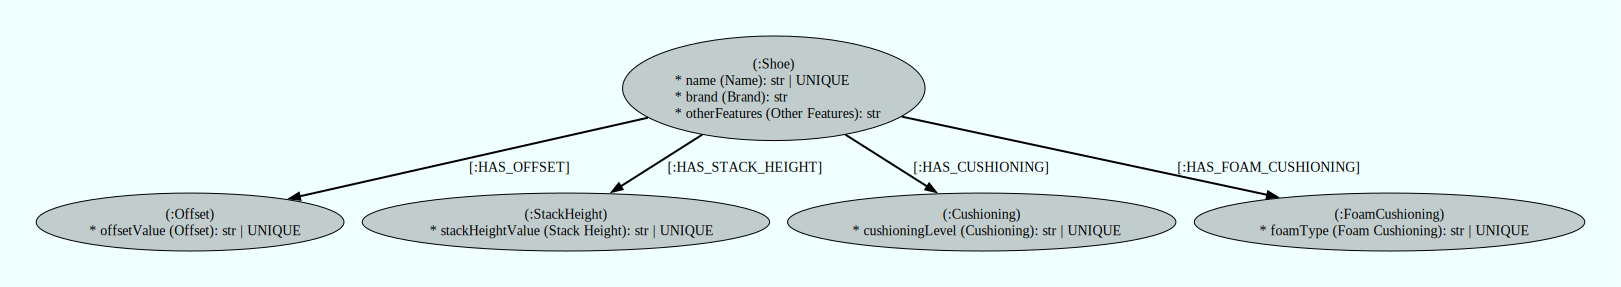

In [11]:
gdm.iterate_model(corrections="remove Feature node and add Other Features as a property to Shoe node.")
gdm.current_model.visualize()

> Generating Data Model...
Attempts | 1  
Received Valid Data Model
Nodes
* (:Shoe)         * (:Offset)
* (:Cushioning)   * (:FoamCushioning) 

Relationships
* (:Shoe)-[:HAS_OFFSET]->(:Offset)                    
* (:Shoe)-[:HAS_CUSHIONING]->(:Cushioning)            
* (:Shoe)-[:HAS_FOAM_CUSHIONING]->(:FoamCushioning)   


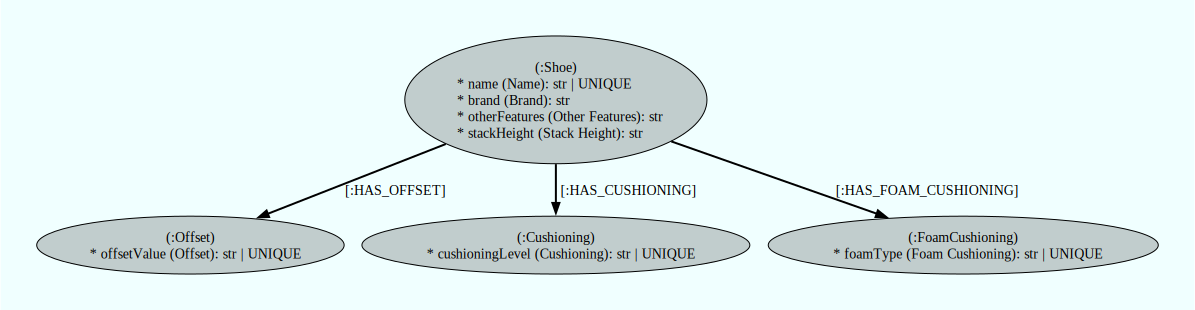

In [12]:
gdm.iterate_model(corrections="Remove stack height node and add stack height property as property to Shoe node.")
gdm.current_model.visualize()

> Generating Data Model...
Attempts | 1  
Received Valid Data Model
Nodes
* (:Shoe)         * (:Offset)
* (:Cushioning)    

Relationships
* (:Shoe)-[:HAS_OFFSET]->(:Offset)           
* (:Shoe)-[:HAS_CUSHIONING]->(:Cushioning)   


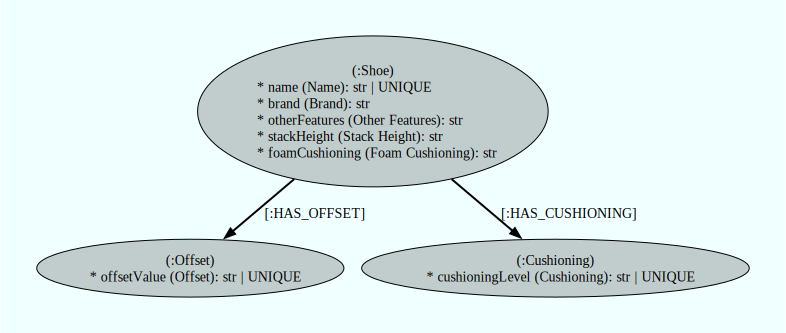

In [13]:

gdm.iterate_model(corrections="Remove foam cushioning node and add foam cushioning property as property to Shoe node.")
gdm.current_model.visualize()